# Computergestützte Mathematik zur Analysis

13.12.2018

&copy; Rüdiger W. Braun 2018

* Gruppe 1: Mo 14:30 - 16:00
* Gruppe 2: Di 12:30 - 14:00
* Gruppe 3: Mi 10:30 - 12:00
* Gruppe 4: Do 12:30 - 14:00
* Gruppe 5: Fr 8:30 - 10:00

In [1]:
from sympy import *
init_printing()
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt

Ungleichungen

In [2]:
x = Symbol('x')
y = Symbol('y')
a = Symbol('a')

In [3]:
f = x**2 + x + 1
g = 2*x**2
f, g

In [4]:
solveset(f>g, domain=Reals)

In [5]:
print(_)

Interval.open(-sqrt(5)/2 + 1/2, 1/2 + sqrt(5)/2)


In [8]:
solveset(sin(x) > cos(x), domain=Reals)

Die korrekte Lösungsmenge ist allerdings periodisch.

In [9]:
solve(sin(x) > cos(x), x)

Die `LambertW`-Funktion

In [11]:
f = x*exp(x)
glg = Eq(f, y)
glg

In [12]:
solveset(glg, x)

In [13]:
solve(glg, x)

Wir schauen uns die Funktion $xe^x$ genauer an

In [14]:
xn = np.linspace(-5, 1.5)
fn = lambdify(x, f, 'numpy')

In [15]:
plt.plot(xn, fn(xn));

$f$ ist offenbar nicht injektiv.  Wo ist die Minimalstelle?

In [16]:
f

In [17]:
df = f.diff(x)
df

In [18]:
solve(df)

In [19]:
x0 = solve(df)[0]

In [22]:
# y0 = fn(x0)
# AttributeError

In [23]:
type(x0)

sympy.core.numbers.NegativeOne

Das hätte man in der Renaissance genauso gesehen.

Eigentlich hätten wir $y_0$ aber auch lieber symbolisch.

In [24]:
y0 = f.subs(x,x0)
x0, y0

In [26]:
xn = np.linspace(float(y0)+.000001, 7, 300) 

Jetzt zeichnen wir den Hauptzweig der `LambertW`-Funktion.  

Es gibt drei Bibliotheken für Mathefunktionen:

* `numpy`:  elemetare Funktionen als ufunc mit doppelter Genauigkeit
* `scipy.special`:  spezielle Funktionen als ufunc mit doppelter Genauigkeit
* `mpmath`:  elementare und spezielle Funktionen mit beliebiger Genauigkeit, aber nicht als ufunc

`Lambertw` ist in `mpmath` und in `scipy.special` (als `lambertw`)

Wir nutzen `lambdify`, obwohl das in diesem einfachen Fall nicht sinnvoll ist.

erste Möglichkeit: List Comprehension

In [27]:
fn1 = lambdify(y, LambertW(y), 'mpmath')

In [28]:
fn1(2)

mpf('0.85260550201372554')

In [29]:
yn1 = [fn1(xx) for xx in xn]

In [30]:
plt.figure()
plt.plot(xn, yn1);

zweite Möglichkeit: `scipy.special` nutzen

In [31]:
from scipy import special
fn2 = lambdify(y, LambertW(y), ['numpy', {'LambertW': special.lambertw}])

In [32]:
fn2(2)

(0.8526055020137254+0j)

In [38]:
yn2 = fn2(xn).real

In [39]:
plt.figure()
plt.plot(xn, yn2);

Jetzt der andere Ast.

In [41]:
xn_minus = np.linspace(float(y0)+.000001, 0)
fn_minus = lambdify(y, LambertW(y, -1), 'mpmath')
yn_minus = [fn_minus(x) for x in xn_minus]

In [42]:
plt.figure()
plt.plot(xn, yn2)
plt.plot(xn_minus, yn_minus);

In [43]:
glg = Eq(2-x, a*log(x))
glg

In [44]:
f = solve(glg, x)
f

In [45]:
N(f[0].subs(a, 20))

Wie verhält sich diese Funktion bei Annäherung an $\infty$?

Zu diesem Zweck wird jetzt die Methode `series` vorgestellt

Reihenentwicklungen

In [46]:
g = cos(x)
g.series(x, 0)

In [50]:
g.series(x, 0, 14)

Zur Weiterverarbeitung muss häufig der Ordnungsterm entfernt werden:

In [48]:
g.series(x, 0, 14).removeO()

In [51]:
g.series(x, pi/2)

In [ ]:
log(x).series(x, 1)

Hier handelt es sich um Taylorpolynome.

In [52]:
h = log(x + 1/x)
h.series(x, 0)

Das bedeutet:

Es gibt $C>0$, so dass 

$$ \left| \log\left( x + \frac1x \right) + \log x - x^2 + \frac{x^4}2 \right| \le C x^6
$$
für $ x \searrow 0 $.

In [53]:
h.series(x, 0, dir='-')

Fragen Sie Dr. Köhne.

Mit derselben Interpretation kann man auch Reihenentwicklungen für $x\to\infty$ bekommen.

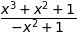

In [55]:
g = (1+x**3+x**2)/(1-x**2)
g

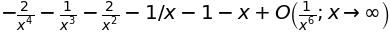

In [56]:
g.series(x, oo)

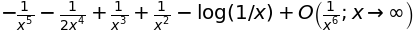

In [57]:
h = log(x + 1/x + 1/x**2) 
h.series(x, oo)

In [58]:
f

In [ ]:
# f[0].series(a, oo)
# RecursionError

Die Reihenentwicklung von `LambertW` in $0$ ist nicht korrekt implementiert.  Das können wir selber machen, indem wir die Taylorkoeffizienten berechnen.  

In [59]:
b = {}

In [60]:
b[0] = LambertW(0)
b[0]

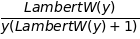

In [61]:
dL = LambertW(y).diff(y)
dL  

In [62]:
# limit(dL, y, 0)  
# RecursionError

Aber $W(y)e^{W(y)}=y$

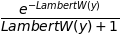

In [63]:
tmp = Symbol('tmp')
dL = dL.subs(LambertW(y), tmp).subs(y, tmp*exp(tmp)).subs(tmp, LambertW(y))
dL

In [64]:
b[1] = dL.subs(y, 0)
b[1]

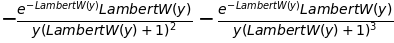

In [65]:
ddL = dL.diff(y)
ddL

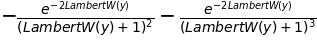

In [66]:
ddL = ddL.subs(LambertW(y), tmp).subs(y, tmp*exp(tmp)).subs(tmp, LambertW(y))
ddL

In [67]:
b[2] = ddL.subs(y, 0)
b[2]

In [68]:
Ws = b[0] + b[1]*y + b[2]/2 * y**2 + O(y**3)
Ws

Ziel: ersetze `LambertW` durch die Approxiamtion

In [69]:
C = Symbol('C')
def Ws(y):
    return b[0] + b[1]*y + b[2]/2*y**2 + C*y**3 # statt O()

In [70]:
(Ws(y)**2).expand() 

In [71]:
f[0]

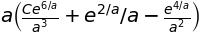

In [72]:
tmp = f[0].replace(LambertW, Ws)
tmp

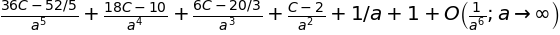

In [73]:
tmp.expand().series(a, oo)

Alle $C$-Term gehören zum $O()$-Term, also

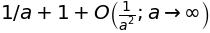

In [74]:
fs = tmp.expand().series(a, oo, 2)
fs

In [75]:
fn = lambdify(a, f[0], ['numpy', {'LambertW': special.lambertw }])
fn(.02)

(1.986274781691728+0j)

In [76]:
plt.figure()
xn = np.linspace(3, 30)
yn = fn(xn).real
plt.plot(xn, yn, label='f')
plt.plot(xn, 1+1/xn, label='approx')
plt.legend();